# Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load and Preprocess dataset

In [37]:
# Load the dataset using pandas.read_csv

df = pd.read_csv("./adult.csv")
df.head(15)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [38]:
df.workclass.describe

<bound method NDFrame.describe of 0             Private
1             Private
2           Local-gov
3             Private
4                   ?
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 48842, dtype: object>

In [39]:
# Print first rows the dataset
print(df.head(1))

   age workclass  fnlwgt education  educational-num marital-status  \
0   25   Private  226802      11th                7  Never-married   

          occupation relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black   Male             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  


In [40]:
# Drop rows with any missing values
print(df.shape)
#for NaN values
df.dropna(inplace = True)
print(f"after droping nans: {df.shape}")

#eliminate ? values
for (column_name , _) in df.items():
    
    mask = df[f"{column_name}"] == '?'
    
    df = df[~mask]
    print(f"after droping ? valus from {column_name}: {df.shape} ")

print(f"final shape {df.shape}")

(48842, 15)
after droping nans: (48842, 15)
after droping ? valus from age: (48842, 15) 
after droping ? valus from workclass: (46043, 15) 
after droping ? valus from fnlwgt: (46043, 15) 
after droping ? valus from education: (46043, 15) 
after droping ? valus from educational-num: (46043, 15) 
after droping ? valus from marital-status: (46043, 15) 
after droping ? valus from occupation: (46033, 15) 
after droping ? valus from relationship: (46033, 15) 
after droping ? valus from race: (46033, 15) 
after droping ? valus from gender: (46033, 15) 
after droping ? valus from capital-gain: (46033, 15) 
after droping ? valus from capital-loss: (46033, 15) 
after droping ? valus from hours-per-week: (46033, 15) 
after droping ? valus from native-country: (45222, 15) 
after droping ? valus from income: (45222, 15) 
final shape (45222, 15)


# Visualize dataset

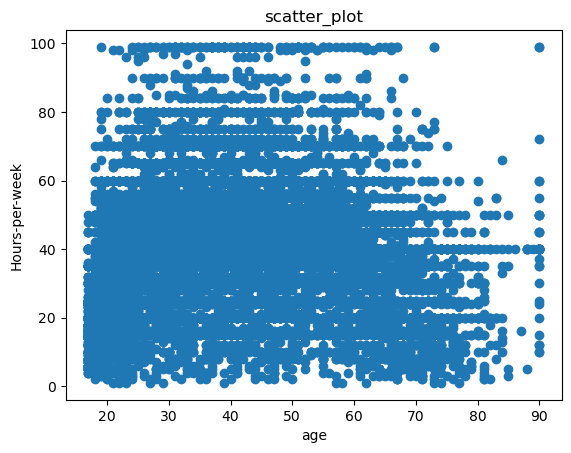

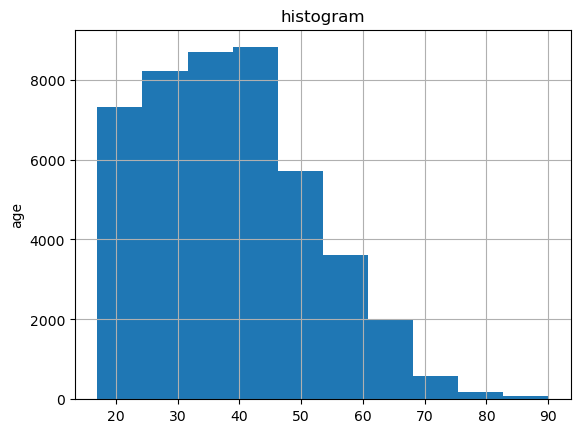

In [45]:
# Visualize the dataset using scatter plots, histograms, box plots, and pair plots to understand the data distribution, identify outliers, and detect patterns.


# Scatter plot for Age vs Hours-per-week

# your code here:

plt.scatter(df.age,df["hours-per-week"] )
plt.title("scatter_plot");plt.xlabel("age");plt.ylabel("Hours-per-week");plt.show();




# Histogram for distribution of age distribution

# your code here:

histogram_values = df.age
histogram_values.hist()
plt.title("histogram");plt.ylabel("age");plt.show();



# Pair plot for Age, education-num, and hours-per-week

# your code here:

?

plt.show()




first quantile:  28.0
second quantile:  37.0
third quantile:  47.0
IQR (Q3 - Q1) :  19.0
LV:  -0.5


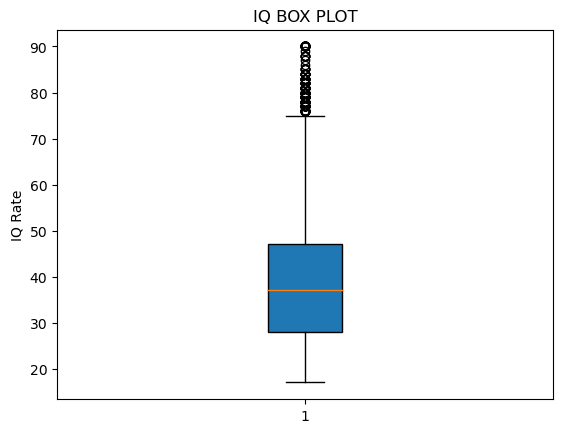

In [47]:
'''
    This function will calculate the quartiles and IQR,LV of given data sets and plot the boxplot as result.
'''
def box_plot(data):
    
    Q1 = np.quantile(data , 0.25)
    Q2 = np.quantile(data , 0.5)
    Q3 = np.quantile(data , 0.75)
    print("first quantile: ",Q1)
    print("second quantile: ",Q2)
    print("third quantile: ",Q3)

    iqr = Q3 - Q1
    print("IQR (Q3 - Q1) : ", iqr)

    LV = Q1 - (1.5 * iqr)
    print("LV: ",LV)
    
    plt.boxplot(data, patch_artist=True)
    plt.title("IQ BOX PLOT");plt.ylabel("IQ Rate");plt.show();
    
# Box plot for age to see outliers

# your code here:

box_plot(df.age)

plt.show()

# Encode and Normalize dataset

In [ ]:
# Use one-hot endcoding to convert categorical features into numerical format

df_encoded = ?

In [ ]:
# Use StandardScaler from sklearn.preprocessing to normalize the features.

scaler = StandardScaler()


# your code here:

?


# Implement PCA from Scratch

In [ ]:
# Start by ensuring all data is numeric and normalized.
# Subtract the mean to center the data, calculate the covariance matrix, find eigenvalues and eigenvectors, sort them, and project the data onto the principal components.
# This section will test your understanding of PCA's mathematical foundation.


# your code here:

?




# Visualize the PCA-reduced data

In [ ]:

# Scatter Plot for 2D PCA Data (choose 2 pricipal components)

# your code here:

?

plt.show()



# Heatmap for Principal Component Correlation
# This requires calculating the correlation matrix between the original data and the PCA-transformed data.

correlation_matrix = ?

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Original Features and Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()



